In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [14]:
f = h5py.File('../hdf5_manipulator/minosmatch_muondat_wt_me1Bdata_0000.hdf5', 'r')

In [15]:
len(f['eventids'][:])

24999

In [16]:
runnums = [int(decode_eventid(eid)[0]) for eid in f['eventids'][:]]

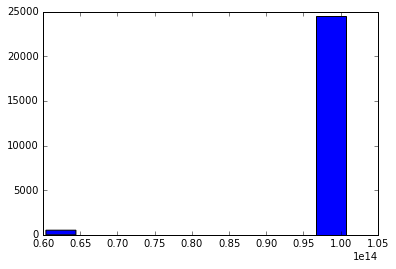

In [17]:
n, bins, patches = plt.hist(f['eventids'])

In [18]:
runnums[:10]

[6038, 6038, 6038, 6038, 6038, 6038, 6038, 6038, 6038, 6038]

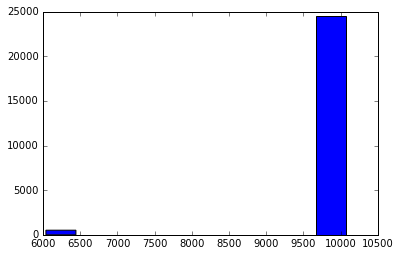

In [19]:
n, bins, patches = plt.hist(runnums)

In [20]:
any(np.array(runnums) == 112205)

False

In [21]:
for name in f:
    print name

eventids
muon_data


In [12]:
n, bins, patches = plt.hist(f['planecodes'])

KeyError: "Unable to open object (Object 'planecodes' doesn't exist)"

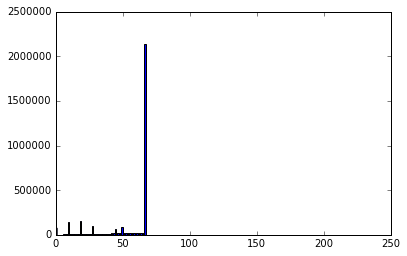

In [18]:
_, _, _ = plt.hist(f['planecodes'], bins=214, range=(0, 214))

In [19]:
import plane_codes

In [20]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


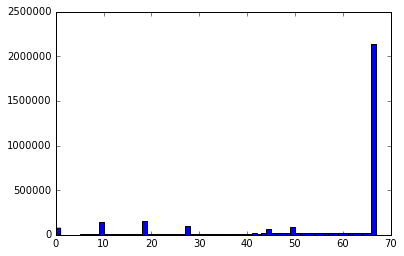

In [21]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(71))

In [22]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([  7.39160000e+04,   1.22600000e+03,   1.39400000e+03,
          1.67400000e+03,   2.55400000e+03,   4.11300000e+03,
          4.98400000e+03,   1.04760000e+04,   1.13630000e+04,
          1.42025000e+05,   1.20470000e+04,   1.22550000e+04,
          1.19700000e+04,   1.24360000e+04,   1.24580000e+04,
          1.25250000e+04,   1.22000000e+04,   1.26150000e+04,
          1.53153000e+05,   1.30300000e+04,   1.26310000e+04,
          1.28060000e+04,   1.30470000e+04,   1.29390000e+04,
          1.29550000e+04,   1.30620000e+04,   1.32120000e+04,
          1.00726000e+05,   1.33040000e+04,   1.34830000e+04,
          1.35170000e+04,   1.37330000e+04,   1.35750000e+04,
          1.34260000e+04,   1.35080000e+04,   1.39930000e+04,
          1.42190000e+04,   1.45240000e+04,   1.44060000e+04,
          1.44700000e+04,   1.45080000e+04,   1.47730000e+04,
          1.45530000e+04,   1.47960000e+04,   7.05280000e+04,
          1.50210000e+04,   1.49720000e+04,   1.51780000e+04,
        

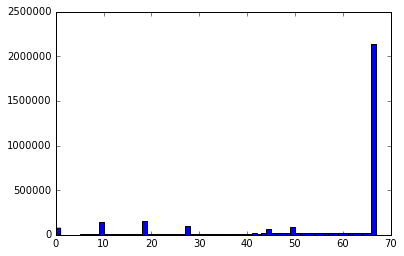

In [23]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


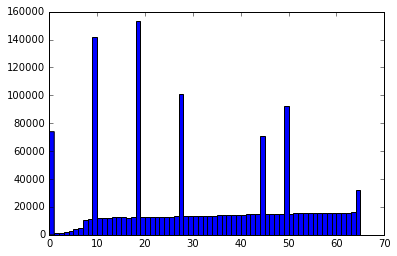

In [24]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [25]:
print any(planes == 67)

False


In [26]:
print any(planes > 66)

False


In [27]:
print any(planes < 0)

False


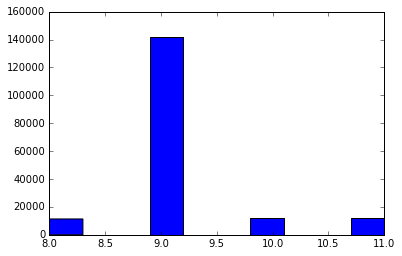

In [28]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

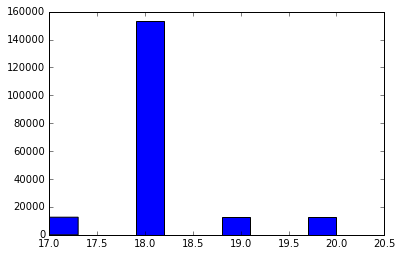

In [29]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

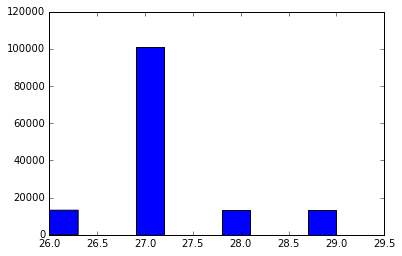

In [30]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

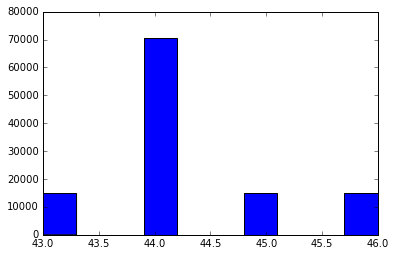

In [31]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

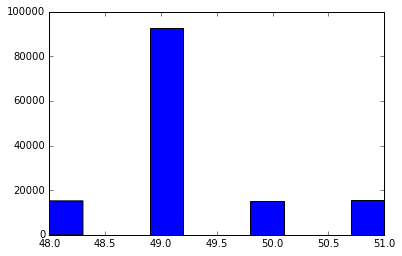

In [32]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [33]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([   32730.,   176497.,   190120.,   155885.,   113675.,   146321.,
           62879.,    66205.,   184765.,    16842.,  2399728.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

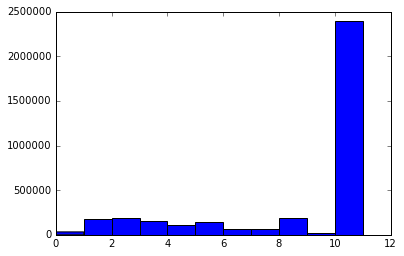

In [34]:
plt.hist(segments, bins=np.arange(12))

In [35]:
print np.min(planes)
print np.max(planes)

0.0
66.0
